# Ondas y Señales
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## Reconociendo el entorno de Jupyter Notebook
Jupyter Notebook es una aplicación web de código abierto que facilita la computación interactiva y colaborativa en docenas de lenguajes de programación, incluidos Python, R y julia; tres lenguajes muy populares entre los científicos de datos en la actualidad.

### Agenda
1. Ondas
1. Señales análogas
1. Señales digitales
1. Ancho de banda 

In [53]:
# Importar módulos al cuaderno
import numpy as np
import matplotlib.pyplot as plt

# Importar elementos de un módulo al cuaderno
from matplotlib.ticker import AutoMinorLocator, FixedLocator
from math import pi
from numpy import sin

## 1. Ondas
---
El proyecto Jupyter permite crear y compartir mediante una web; documentos que contienen código de simulación numérica en vivo, ecuaciones en <code>LaTeX</code>, distintas visualizaciones gráficas y texto narrativo en un mismo lugar.

Actualmente está viendo un editor de texto plano basado en <code>Jupyter Notebook</code>. Es un documento interactivo que admite la combinación de código, salida estándar y documentación en formato markdown.

Esta celda es una celda de documentación en markdown; para editar el texto en esta celda, simplemente haga doble clic en la celda para cambiar al modo de edición.

La celda a continuación es una celda de código. Puede cambiar una celda entre código y documentación desde la lista desplegable o haciendo clic en las llaves \{\} (paréntesis angulares) de la parte superior, según el entorno de trabajo.

También es posible conmutar entre los tipos de celda pulsando los atajos de teclado:
* <code>tecla M</code>: celda de documentación.
* <code>tecla Y</code>: celda de código.

-------------------------------------------------------
 Frecuencia de la portadora:                2.5 Khz
 Periodo de la portadora:                   0.4 ms
 Fase de la portadora:                      0.0 rad
 Frecuencia angular de la portadora:   15,708.0 rad/s
 Longitud de onda de la portadora:          0.1 mts
-------------------------------------------------------


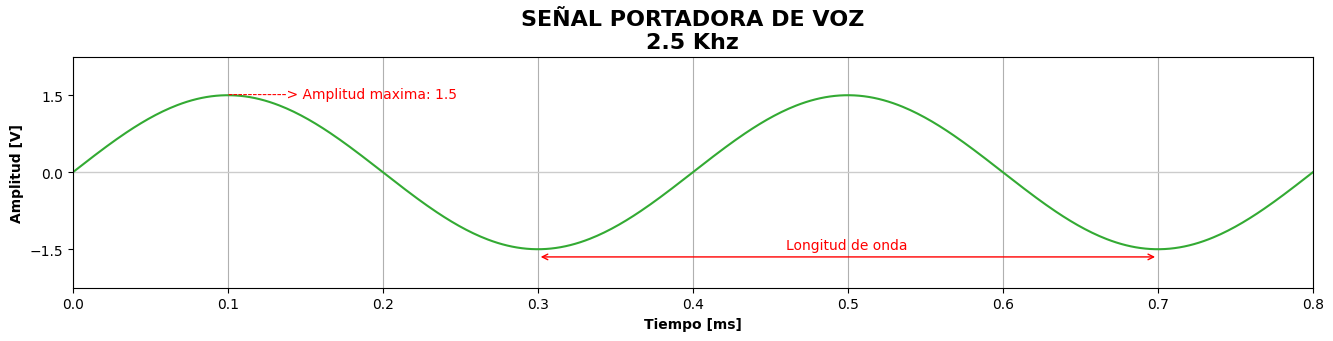

In [151]:
# Caracterización de una onda (Voz)
# ---------------------------------------------------------
f = 2_500           # Frecuencia de la onda voz (3400)
A = 1.5             # Amplitud de la onda (40 dB)
θ = 0
v = 343.2           # Velocidad del sonido (propagación)
# ---------------------------------------------------------
W = 2 * pi * f      # Frecuencia angular de la onda
T = 1/f             # Periodo de la onda
λ = v/f             # Longitud de onda de la portadora
# ---------------------------------------------------------
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/f, 512, endpoint=True)
lambdas = np.linspace(250*λ/v, 1750*λ/v, 7, endpoint=True)

# Onda
# ---------------------
y = A * sin(W*t+θ)

# Salida estándar
print(55*"-")
print(f" Frecuencia de la portadora:            {f/1_000:7.1f} Khz")
print(f" Periodo de la portadora:               {1000*T:7.1f} ms")
print(f" Fase de la portadora:                  {θ:7.1f} rad")
print(f" Frecuencia angular de la portadora:   {round(W):,.1f} rad/s")
print(f" Longitud de onda de la portadora:      {λ:7.1f} mts")
print(55*"-")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de AM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
t *= 1_000         # Transformando t a ms

plt.axhline(y=0, linewidth=1.0, color="#ccc")
plt.plot(t, y, color="#33aa33")
# plt.axhline(y=-A*1.1, xmin=3/8, xmax=7/8, linewidth=1.0, color="#f00")

plt.grid(axis="x", which="major")

plt.annotate(
    "", xy=(1750*λ/v, -A*1.1), xytext=(750*λ/v, -A*1.1),
    arrowprops=dict(arrowstyle="<->", color="#f00"))

# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(y.min()*1.5, y.max()*1.5)
plt.yticks([y.min(), 0, y.max()])

# Textos en la gráfica
plt.title(
    "Señal portadora de voz\n".upper()
    + f"{f/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [ms]", fontweight="bold")
plt.ylabel("Amplitud [V]", fontweight="bold")
plt.text(
    250*λ/v-(1000*T*θ/(2*pi)),
    y.max()*0.96,
    f"------------> Amplitud maxima: {A}", color="#ff0000")
plt.text(
    1150*λ/v,
    -A,
    f"Longitud de onda", color="#ff0000")
plt.show()

## 2. Señales análogas
---
Antes de iniciar la ejecución del código debe escoger el núcleo o <code>Kernel</code> para la ejecución de dicho código; en este curso usaremos el lenguaje Python en su versión 3.8, pero también son posibles otros lenguajes de programación y versiones de Python como ya se mencionó anteriormente.

Puede elegir ejecutar celdas de diferentes maneras:
* Una celda individual
* Todas las celdas hacia abajo.
* Todas las celdas hacia arriba.
* Todas las celdas de código en un <code>Jupyter Notebook</code>.

>**NOTA:** siempre tenga en cuenta que si una celda no ha sido ejecutada sus resultados no estarán disponibles y entonces la ejecución de una celda que necesite esos datos puede fallar o dar resultados incorrectos.

----------------------------------------------
 Frecuencia de la portadora:         740.0 Khz
 Longitud de onda de la portadora:   405.1 mts
----------------------------------------------


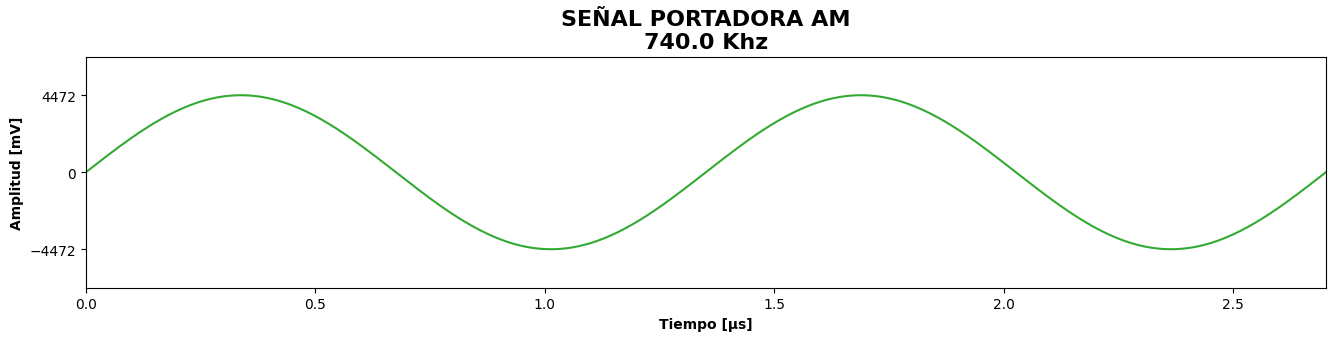

In [4]:
# [iPython] - Gráficas - Caracterización de una señal de AM
# ---------------------------------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
fp = 740_000            # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Velocidad de la luz (propagación ondas electromagnéticas)
c = 299_792_458
# Potencia de un transmisor de 1 KW y antena de (50 Ω) - 100Km
Potencia = 1_000
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
λp = c/fp                # Longitud de onda de la portadora
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000:7.1f} Khz")
print(f" Longitud de onda de la portadora: {λp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de AM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV
plt.plot(t, Sp, color="#33aa33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora AM\n".upper() +
          f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

----------------------------------------------
 Frecuencia de la portadora:         101.1 Mhz
 Longitud de onda de la portadora:     3.0 mts
----------------------------------------------


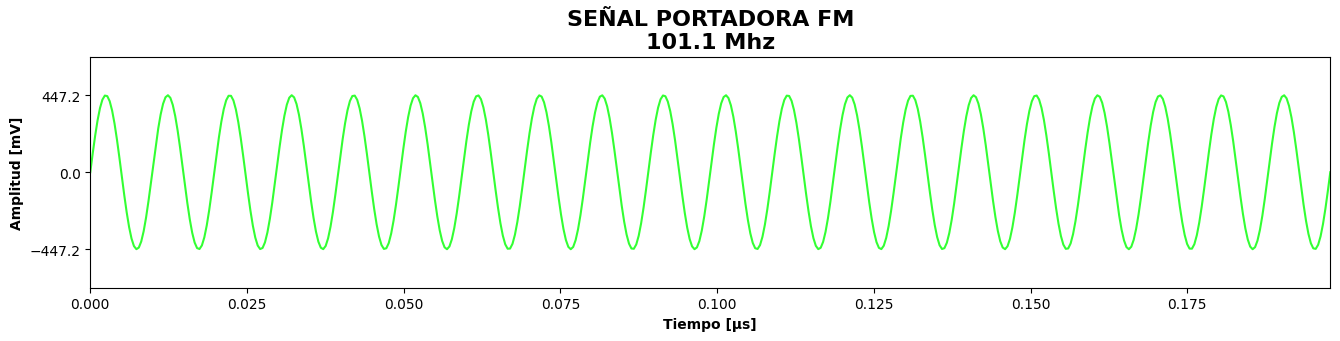

In [5]:
# [iPython] - Gráficas - Caracterización de una señal de FM
# ---------------------------------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
fp = 101_100_000        # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 10 W y antena de (50 Ω - 10Km)
Potencia = 10
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 20                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000_000:7.1f} Mhz")
print(f" Longitud de onda de la portadora: {299_792_458/fp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de FM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV
plt.plot(t, Sp, color="#33FF33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora FM\n".upper() +
          f"{fp/1_000_000:.1f} Mhz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

---
## Mas Recursos
- [Radio AM](https://es.wikipedia.org/wiki/Radio_AM) (Wikipedia)
- [Detector de envolvente](https://es.wikipedia.org/wiki/Detector_de_envolvente) (Wikipedia)
- [Detector de envolvente](https://oshwlab.com/giancarlobenavides/am_rx) (Esquemático)
- [AM Transmitter Specifications](https://broadcaststoreeurope.com/upload_dir/shop/Nautel-J1000-specs.pdf) 
(PDF)
